# Introducción a regresión lineal 
los datos se obtubieron de aqui 
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/



## Importando datos

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                header=None, # evitamos que el primer registro quede como titulo de columna
                sep='\s+')  # en vez de que este separado por comas, esta separado por espacios
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # add columns from. housing.names > housing.txt
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.
en este caso nos enfocaremos en 5 variables pricnipales. 
- DIS       weighted distances to five Boston employment centres
- INDUS     proportion of non-retail business acres per town
- CRIM      per capita crime rate by town
- RM        average number of rooms per dwelling
- MEDV     Median value of owner-occupied homes in $1000's

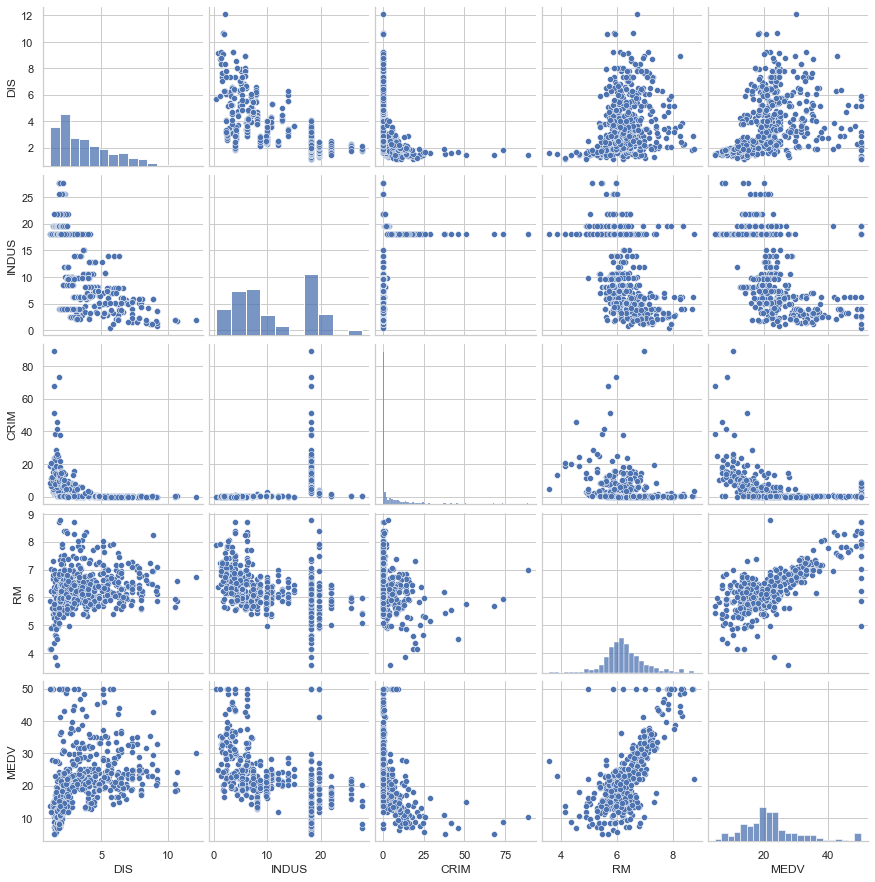

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook') # set styles
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV'] # MEDV = Y predict variables 
sns.pairplot(df[cols], 
             height=2.5) # tamaño de los recuadros 
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones. 

<AxesSubplot:>

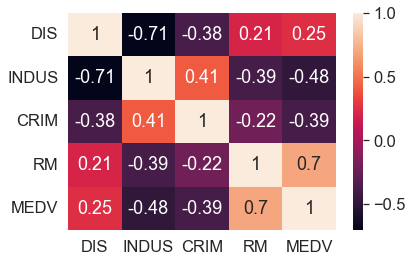

In [4]:
import numpy as np
cm = np.corrcoef(df[cols].values.T) # tambien se pudo haber usado el metodo de DF : cm =  df[cols].corr()
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

ten en consideracion que corr() usa el método de pearson pero también se puede usar el metodo de kendall o spearman

## Creando el modelo con scikit-learn

In [18]:
from sklearn.preprocessing import StandardScaler # escalador basado en la mean y std de los datos
from sklearn.linear_model import LinearRegression
print("shape x: ",df['RM'].shape) # aqui podemos ver que es la data es un vector
X = df['RM'].values.reshape(-1, 1) # el -1 es decir que esa dimension es arbitraria parecido a (n,1) y se asigna dinamicamente
y = df['MEDV'].values.reshape(-1, 1) # (506,).reshape(-1, 1) > (506,1)  (506,).reshape(1, -1) > (1,506)
print("despues de reshape: ")
print("shape x: ", X.shape, "\n", X[:3])

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X) # creamos un scalador para cada modelo ya que sus std y mean varian 
y_std = sc_y.fit_transform(y)
print("despues de escalar: ", "\n", sc_x.transform(X)[:3])

slr = LinearRegression() # creamos el modelo de SLR
slr.fit(X_std, y_std) # entrenamos 

shape x:  (506,)
despues de reshape: 
shape x:  (506, 1) 
 [[6.575]
 [6.421]
 [7.185]]
despues de escalar:  
 [[0.41367189]
 [0.19427445]
 [1.28271368]]


LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

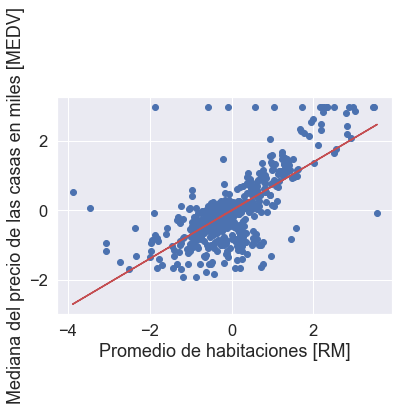

In [20]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='r') # vemos que X y Y (respuesta del modelo) es una linea recta 
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

In [21]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1)) #escalamos(array(reshape(X)))
print("El precio de una casa con 5 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))
# desescalado(prediccion_modeloRL(X_escalado))

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]


# Regresión lineal multivariable

In [33]:
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)


slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

# analisis de resultados 
haremos una grafica interactiva usando plotly
https://plotly.com/python/ml-regression/

In [28]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
mesh_size = .02
margin = 0

# Create a mesh grid on which we will run our model
x_min, x_max = X[:,0].min() - margin, X[:,0].max() + margin
y_min, y_max = X[:,1].min() - margin, X[:,1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = slr.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()